## **2D Linear Convection**

The 2-D Linear Convection equation is very simple:

$$  \frac{\partial{}u}{\partial{t}} + c\frac{\partial{u}}{\partial{x}} + c\frac{\partial{u}}{\partial{y}} = 0  $$

We can discretise the linear convection equation as follows:

$$  \frac{u_{i, j}^{n + 1} - u_{i, j}^{n}}{\Delta{t}} + c\frac{u_{i, j}^{n} - u_{i - 1, j}^{n}}{\Delta{x}} + c\frac{u_{i, j}^{n} - u_{i, j - 1}^{n}}{\Delta{y}} = 0  $$

This can be rearranged:

$$  u_{i,j}^{n + 1} = u_{i,j}^{n} - c\frac{\Delta{t}}{\Delta{x}}(u_{i,j}^{n} - u_{i - 1,j}^{n}) - c\frac{\Delta{t}}{\Delta{y}}(u_{i,j}^{n} - u_{i, j - 1}^{n})  $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))

un = np.ones((ny, nx))

In [3]:
# set initial conditions
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2 

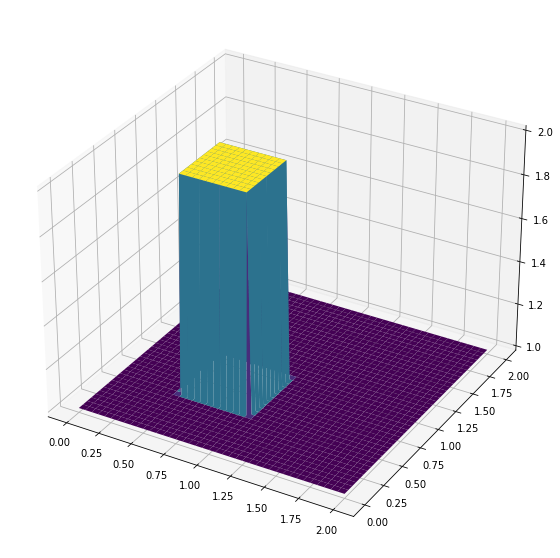

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')

In [5]:
for n in range(nt + 1):
    
    un = u.copy()    
    for j in range(u.shape[0]):
        for i in range(u.shape[1]):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) - (c * dt / dy * (un[j, i] - un[j - 1, i])))

            # boundary conditions
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

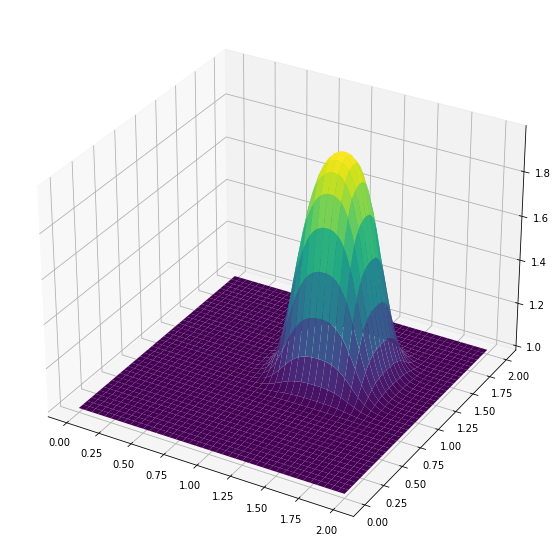

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap='viridis')